# DecisionTree visualization

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

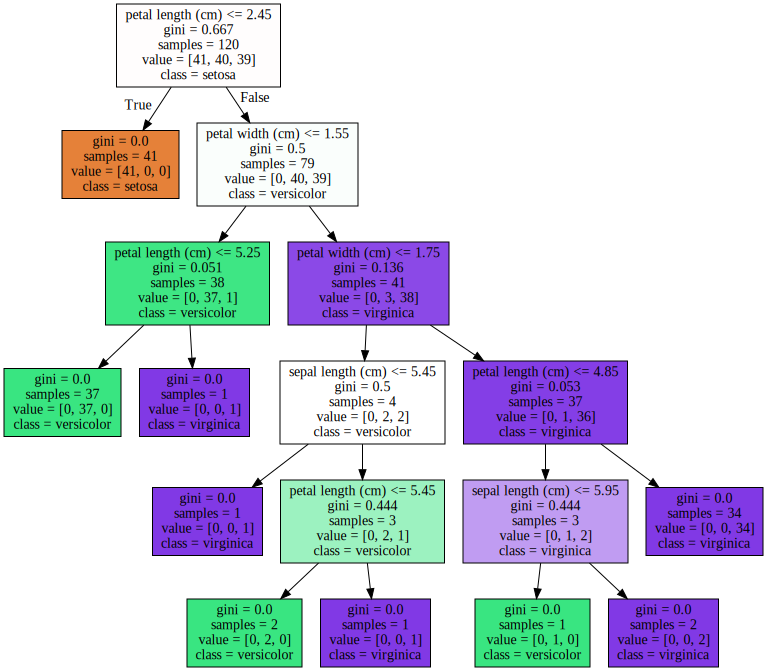

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)
import graphviz
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


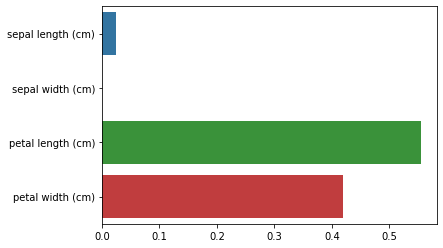

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

In [5]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

# DecisionTree Overfitting

In [13]:
X_features

array([[ 0.88426577, -2.77259276,  1.43370121],
       [ 0.88254664, -0.39095338,  1.26661394],
       [ 1.20888898,  0.14195316,  0.64232637],
       [ 1.12463497,  0.52106488,  2.13646176],
       [ 1.09665605,  0.09740017,  1.79445113],
       [ 0.93061711,  0.52389102,  0.41718036],
       [ 1.23240644, -1.67600381,  1.57948486],
       [ 0.12041909, -0.34598178, -1.68941375],
       [ 1.10447379,  0.39009332,  0.35117341],
       [-0.85450433, -0.4664191 ,  1.23936212],
       [-0.65122279, -1.54079701,  0.97865617],
       [ 0.85144036,  1.21114529,  0.42548085],
       [ 0.27299061,  0.66638308, -2.32110537],
       [-0.10789457, -0.46071979, -0.65942376],
       [-0.77035632, -2.06998503,  1.03845844],
       [ 0.79625824,  0.1887786 , -0.28978825],
       [ 1.3641878 ,  0.61037938,  1.35329628],
       [ 0.74261606,  0.23218104,  0.21874422],
       [ 0.85144223, -0.65240858,  0.86582546],
       [ 0.31338067, -1.04525337, -0.87926516],
       [ 1.01037788, -1.5829384 ,  0.594

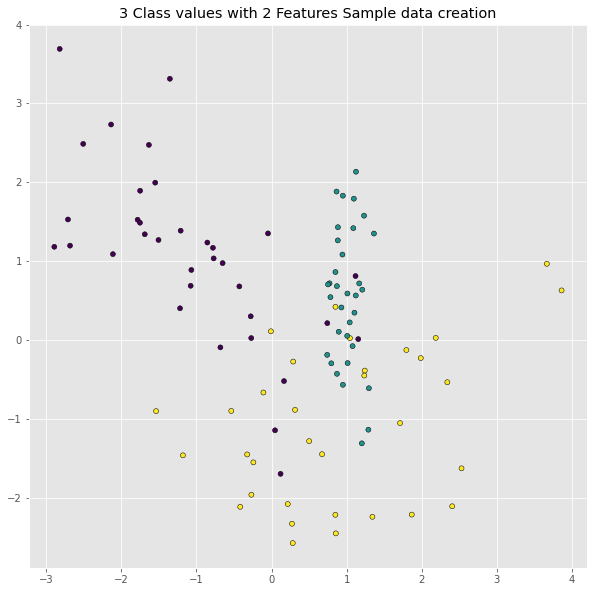

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.figure(figsize = (10,10))
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(
    n_features = 2,             # 독립 변수의 수, default = 20
    n_redundant = 0,            # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, default = 2
    n_informative = 2,          # 독립 변수 중 종속 변수와 상관관계가 있는 성분의 수, default = 2
    n_classes = 3,              # 종속 변수의 클래스 수, default = 2
    n_clusters_per_class = 1,   # 클래스 당 클러스트의 수, default = 1
    random_state = 0            
)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
# visualize_boundary(dt_clf, X_features, y_labels) 경계 시각화는 배워서 해보기

NameError: ignored

# 결정 트리 실습

## feature.txt

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 :', feature_name[:10])

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [18]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [20]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt']) # cumcount는 연속으로 그 값이 몇번 나타나는지 알려주는 함수
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis = 1)
  return new_feature_name_df

In [66]:
import pandas as pd

def get_human_dataset():
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('X_train.txt', sep='\s+', names = feature_name)
  X_test = pd.read_csv('X_test.txt', sep='\s+', names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', header = None, names = ['action'])
  y_test = pd.read_csv('y_test.txt', sep = '\s+', header = None, names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 변환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [67]:
print('## 학습 피처 데이터셋 infro()')
print(X_train.info())

## 학습 피처 데이터셋 infro()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 1 to 561
dtypes: float64(561)
memory usage: 31.5 MB
None


In [68]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 :{0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도 :0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}
